# A Helpful Class to Interface With the Patient Data
Based off of Pandas Dataframes

In [1]:
from utils.Database import Database

## Database Interface:
Database Methods deal with database-wide searches, meaning they are functions that are not specific for a single patient.
# Initialize Database

In [2]:
d = Database()

Connect To Database


encryption key: ········


Connected: {'user': 'postgres', 'channel_binding': 'prefer', 'dbname': 'clinical', 'host': 'clinical_db', 'port': '5432', 'options': '-c search_path=clinical_document,public', 'sslmode': 'require', 'sslcompression': '0', 'sslcertmode': 'allow', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'gssdelegation': '0', 'target_session_attrs': 'any', 'load_balance_hosts': 'disable'}


## Get list of projects and their UUID

In [3]:
d.fetch_projects()

,name,description,uuid
0,test,test,31cb95c5-7832-41a4-a1ab-08feb6e96694
1,test-simple,test-simple,4b2d7f6f-3f1a-4589-b346-38dbf6fb4d58


In [4]:
### Set Project UUID

In [4]:
d.set_project_uuid('4b2d7f6f-3f1a-4589-b346-38dbf6fb4d58')

project_uuid: 4b2d7f6f-3f1a-4589-b346-38dbf6fb4d58


### 1. fetch_mrns()
Return a list of all the mrns found in the database


In [5]:
d.fetch_mrns()

['111111', '333333', '555555', '666666', '777777', '888888']

### 2. search_name
MRN Lookup by Name.  Case-insensitive


In [6]:
d.search_name()

,mrn,first_name,last_name
0,111111,Chandler,NaN
1,None,NaN,None


In [7]:
#Can specify last name to look for in the Database.  
d.search_name(last_name = "Smith3")

,mrn,first_name,last_name


In [8]:
#Specify First Name 
d.search_name(first_name = "John3")

,mrn,first_name,last_name


In [9]:
#Or Both
d.search_name(first_name = "John3", last_name = "Smith3")

,mrn,first_name,last_name


### 3. search()
Lookup by tag.  Returns all data that matches a given tag.  CASE-SENSITIVE

In [10]:
d.search("diagnosis")

,diagnosis
mrn,
333333,c61 - Malignant neoplasm of prostate
555555,c61 - Malignant neoplasm of prostate
666666,c61 - Malignant neoplasm of prostate
777777,c61 - Malignant neoplasm of prostate
888888,c61 - Malignant neoplasm of prostate


In [11]:
d.search(tag="psa", icd10='c61')

""


## Patient Interface
A simplistic way to retrieve the data for each patient

In [12]:
p = d.Patient(mrn = '111111')

In [13]:
#lists all the tags related to the patient with mrn 666666
p.icd10_tags

['dob', 'document', 'first_name', 'mrn']

In [14]:
#prints out all data relating to this patient
p

MRN: 111111

dob:
         date
0  1952-12-17
1  1952-12-17

document:
         date      type
0  2023-12-06  clinical
1  2022-12-06  clinical

first_name:
  first_name
0   Chandler

mrn:
111111


## Pandas-like Indexing

In [15]:
p['first_name']

,first_name
0,Chandler


In [1]:
p['c61:psa']

NameError: name 'p' is not defined

In [17]:
p['c61:external-radiation']

AttributeError: 'Patient' object has no attribute 'c61:external-radiation'

In [20]:
#multi index.
fname, lname, dob = p["first_name", "last_name", "dob"]
print(fname)
print(lname)
print(dob)

  first_name
0   Chandler
  last_name
0      Bing
         date
0  1952-12-17
1  1952-12-17


## Example Use Case: Time Series

In [21]:
#Fill these as seen fit.  For example, if one patient has prostate cancer, 
#in order to plot psa level vs time, then attr = c61.psa.
mrn = 666666
tag = 'c61:psa'
attr = 'psa'
p = d.Patient(mrn)


         date   psa   unit
2  2019-10-10  0.87  ng/mL
0  2021-06-22  5.36  ng/mL
1  2021-07-23  2.22  ng/mL
3  2021-08-24   1.5  ng/mL
9  2022-09-14  0.83  ng/mL
6  2022-10-19  0.08  ng/mL
5  2022-11-16     0  ng/mL
4  2023-05-17     0  ng/mL
7  2023-10-16     0  ng/mL
8  2023-12-15     0  ng/mL


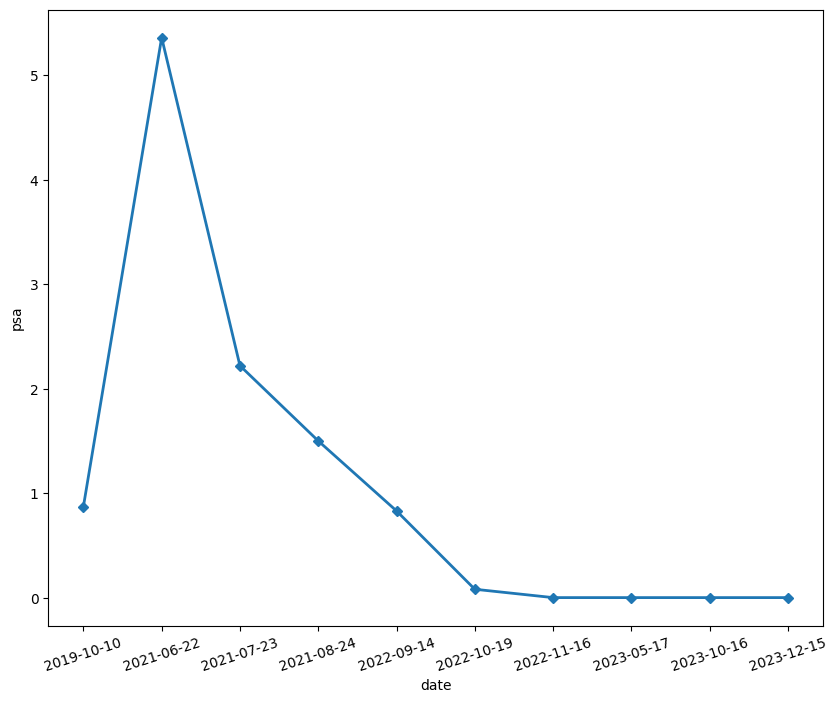

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
def plotTimeSeries(x,y):
    y = pd.to_numeric(y)  #Making sure that the y-axis is a numeric variable
    fig,ax = plt.subplots()
    fig.set_size_inches(10,8)
    ax.tick_params(axis='x', labelrotation = 18)
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.plot(x, y, marker = "D", linewidth = 2, markersize = 5)

df = p[tag]
df = df.sort_values(by = "date")
print(df)

x = df["date"]
y = df[attr] #fill in the specific datapoint that is wanted to be plotted against.

plotTimeSeries(x,y)

## One Last Method(For Debugging)

In [23]:
help(p.rawdata)
p.rawdata("c61:psa")

Help on method rawdata in module utils.Database:

rawdata(icd10_tag) method of utils.Database.Patient instance
    Input: icd10_tag -> Output: data for that attribute in a list of dictionaries. 
    The data returned is exactly how it is stored in the SQL database.
    For example: [{'name': 'date', 'type': 'date', 'value': '2022-11-28'}, {'name': 'psa', 'type': 'number', 'value': 0.16}, {'name': 'unit', 'type': 'list', 'value': 'ng/mL'}]
    The rationale for the existence of this method is twofold.
    1. There is a bug in setting an attribute due to a weird data entry or something else.
    2. It is hard to access a single cell of data in a DataFrame.  A dictionary is a lot easier.



[[{'name': 'date', 'type': 'date', 'value': '2021-06-22'},
  {'name': 'psa', 'type': 'number', 'value': 5.36},
  {'name': 'unit', 'type': 'list', 'value': 'ng/mL'}],
 [{'name': 'date', 'type': 'date', 'value': '2021-07-23'},
  {'name': 'psa', 'type': 'number', 'value': 2.22},
  {'name': 'unit', 'type': 'list', 'value': 'ng/mL'}],
 [{'name': 'date', 'type': 'date', 'value': '2019-10-10'},
  {'name': 'psa', 'type': 'number', 'value': 0.87},
  {'name': 'unit', 'type': 'list', 'value': 'ng/mL'}],
 [{'name': 'date', 'type': 'date', 'value': '2021-08-24'},
  {'name': 'psa', 'type': 'number', 'value': 1.5},
  {'name': 'unit', 'type': 'list', 'value': 'ng/mL'}],
 [{'name': 'date', 'type': 'date', 'value': '2023-05-17'},
  {'name': 'psa', 'type': 'number', 'value': '0'},
  {'name': 'unit', 'type': 'list', 'value': 'ng/mL'}],
 [{'name': 'date', 'type': 'date', 'value': '2022-11-16'},
  {'name': 'psa', 'type': 'number', 'value': '0'},
  {'name': 'unit', 'type': 'list', 'value': 'ng/mL'}],
 [{'nam